In [5]:
import pandas as pd
import numpy as np


In [2]:
PATH = "../Notebooks - Class/Datasets/titanic.csv"  # works if pwd = '.../ds-1.1/Quiz'

df = pd.read_csv(PATH)

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Using matplotlib

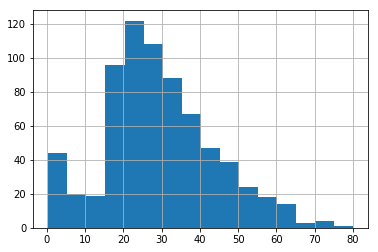

In [6]:
import matplotlib.pyplot as plt

df["Age"].hist(bins=16)
plt.show()

How many age values are `null`?

In [10]:
age_df = df["Age"]
age_df.isna().sum()

177

Create new column as gender, when female is zero and male is one.

In [19]:
sex_df = df["Sex"]
mapped_df = sex_df.map({"female": 1, "male":0})
# Setting new column
df["Gender"] = mapped_df
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


slice dataframe for those whos embarked section was "C"

In [29]:
embarked_at_c_df = df["Embarked"] == "C"

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866     True
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889     True
890    False
Name: Embarked, Length: 891, dtype: bool

plot the age range for those embarked where "C"

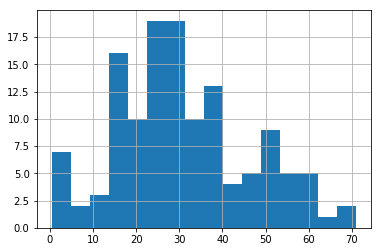

In [34]:
embarked_at_c_df = df["Embarked"] == "C"
embarked_at_c_age_range_df = df[embarked_at_c]["Age"]
# plot histogram
embarked_at_c_age_range_df.hist(bins=16)

Normal distribution for embarked_at_c_age_range_df

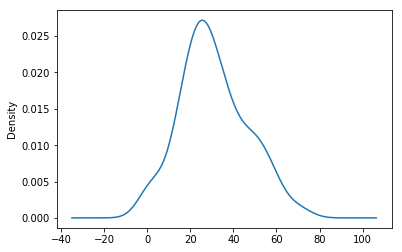

In [45]:
embarked_at_c_age_range_df.plot(kind="kde")

## Seaborn (antther way of counting and plotting)

male      577
female    314
Name: Sex, dtype: int64

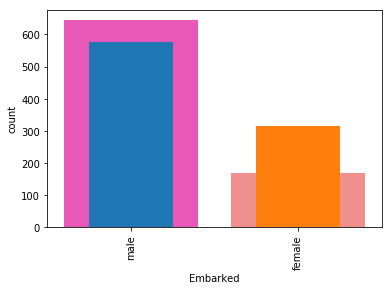

In [40]:
import seaborn as sns

# bar chart
sns.countplot(x="Embarked", palette="spring", data=df)


## plot how many of the passengers were children, youth ... based on there Sex for those who embarked at "C"

In [53]:
embarked_at_c_df = df[df["Embarked"] == "C"]

for i in embarked_at_c_df.groupby("Sex")["Age"]:
    print(i)


('female', 1      38.00
9      14.00
19       NaN
31       NaN
39     14.00
43      3.00
52     49.00
111    14.50
114    17.00
128      NaN
140      NaN
177    50.00
194    44.00
195    58.00
215    31.00
218    32.00
240      NaN
255    29.00
256      NaN
258    35.00
291    19.00
299    50.00
306      NaN
307    17.00
309    30.00
310    24.00
311    18.00
319    40.00
325    36.00
329    16.00
       ...  
496    54.00
513    54.00
523    44.00
533      NaN
537    30.00
539    22.00
556    48.00
578      NaN
581    39.00
591    52.00
608    22.00
641    24.00
644     0.75
691     4.00
700    18.00
702    18.00
710    24.00
716    38.00
742    21.00
780    13.00
830    15.00
835    39.00
842    30.00
849      NaN
852     9.00
858    24.00
866    27.00
874    28.00
875    15.00
879    56.00
Name: Age, Length: 73, dtype: float64)
('male', 26       NaN
30     40.00
34     28.00
36       NaN
42       NaN
48       NaN
54     65.00
57     28.50
60     22.00
64       NaN
65       NaN
73   